# Recency Weighted Bias Incremental Approach

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

In [2]:
class Bandit:

    def __init__(self, epsilon=0., step_size=0.1, constant_stepsize=None):
        self.step_size = step_size
        self.indices = np.arange(10)
        self.time = 0
        self.average_reward = 0
        self.true_reward = 0.
        self.epsilon = epsilon
        self.constant_stepsize=constant_stepsize

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        q_best = np.max(self.q_est)
        return np.random.choice(np.where(self.q_est == q_best)[0])


    def update_action_value(self, action):

        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.time

        if not self.constant_stepsize:
            self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]        
        else:
            self.q_est[action] += self.step_size * (reward - self.q_est[action])
 
        return reward

In [3]:
def non_stationary(runs, time, bandits):
    
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        print("Bandit ", i)
        for r in range(runs):
 
            if r %100 ==0:
                print("Iterations: ", r)
            
            bandit.q_true = np.random.randn(10) + np.random.normal(0,0.1)
            bandit.q_est = np.zeros(10)
            bandit.action_count = np.zeros(10)
            bandit.best_action = np.argmax(bandit.q_true)
            bandit.time = 0
            
            for t in range(time):
                action = bandit.choose_action()
                reward = bandit.update_action_value(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1

    return best_action_counts.mean(axis=1)


Bandit  0
Iterations:  0
Iterations:  100
Iterations:  200
Iterations:  300
Iterations:  400
Iterations:  500
Iterations:  600
Iterations:  700
Iterations:  800
Iterations:  900
Iterations:  1000
Iterations:  1100
Iterations:  1200
Iterations:  1300
Iterations:  1400


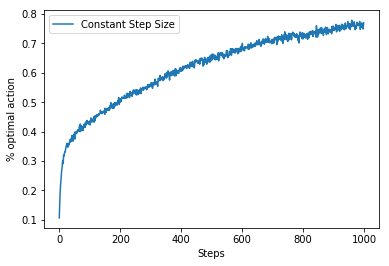

In [4]:
runs, time=1500,1000
bandits = []
bandits.append(Bandit(epsilon=0.1, step_size=0.1, constant_stepsize=True))
#bandits.append(Bandit(epsilon=0.1, constant_stepsize=False))
best_action_counts = non_stationary(runs, time, bandits)

plt.plot(best_action_counts[0], label='Constant Step Size')
#plt.plot(best_action_counts[1], label='Not Constant Step Size')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()
